# Introduction


In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import kaggle
%matplotlib inline

# Data wrangling
## Download datasets from Kaggle and unzip them locally

In [2]:
!kaggle datasets download -d airbnb/boston
!kaggle datasets download -d airbnb/seattle
!unzip boston.zip
!unzip seattle.zip

Dataset URL: https://www.kaggle.com/datasets/airbnb/boston
License(s): CC0-1.0
boston.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/airbnb/seattle
License(s): CC0-1.0
seattle.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
df_boston = pd.read_csv("./boston/listings.csv")
df_seattle = pd.read_csv("./seattle/listings.csv")

### This is an example record, we can use this as a rough template to see what variables we want to use in our analysis

In [9]:
with pd.option_context('display.max_rows',None,'display.max_columns',None): 
    display(df_boston.loc[1,:])

id                                                                            3075044
listing_url                                      https://www.airbnb.com/rooms/3075044
scrape_id                                                              20160906204935
last_scraped                                                               2016-09-07
name                                                Charming room in pet friendly apt
summary                             Charming and quiet room in a second floor 1910...
space                               Small but cozy and quite room with a full size...
description                         Charming and quiet room in a second floor 1910...
experiences_offered                                                              none
neighborhood_overview               The room is in Roslindale, a diverse and prima...
notes                               If you don't have a US cell phone, you can tex...
transit                             Plenty of safe str

## Compare column headers for both data frames and drop extras

In [11]:
df_boston.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [13]:
df_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### The Seattle data doesn't have any columns that the Boston one doesn't contain

In [16]:
df_seattle.columns.difference(df_boston.columns)

Index([], dtype='object')

### The Boston data has three extra columns. These are text fields, so we won't use them in this data analysis and will be fine to drop them from the data frame.

In [23]:
df_boston.columns.difference(df_seattle.columns)

Index(['access', 'house_rules', 'interaction'], dtype='object')

In [25]:
cols = ['access', 'interaction', 'house_rules']
df_boston.drop(cols, axis=1, inplace=True)

## Drop columns that don't have data we want to include

In [28]:
cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 
       'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 
       'host_picture_url', 'calendar_last_scraped', 'first_review', 'last_review']
df_boston.drop(cols, axis=1, inplace=True)
df_seattle.drop(cols, axis=1, inplace=True)

## Find and drop columns that are mostly filled with missing data

In [35]:
total = df_boston.isnull().sum().sort_values(ascending=False)
percent = (df_boston.isnull().sum()/df_boston.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_filtered = missing_data[missing_data['Percent']>.25]
missing_data_filtered.head(15)

Total   Percent
has_availability               3585  1.000000
jurisdiction_names             3585  1.000000
license                        3585  1.000000
neighbourhood_group_cleansed   3585  1.000000
square_feet                    3529  0.984379
monthly_price                  2697  0.752301
weekly_price                   2693  0.751185
security_deposit               2243  0.625662
cleaning_fee                   1107  0.308787

In [37]:
total = df_seattle.isnull().sum().sort_values(ascending=False)
percent = (df_seattle.isnull().sum()/df_seattle.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_filtered = missing_data[missing_data['Percent']>.25]
missing_data_filtered.head(15)

Total   Percent
license            3818  1.000000
square_feet        3721  0.974594
monthly_price      2301  0.602672
security_deposit   1952  0.511262
weekly_price       1809  0.473808
cleaning_fee       1030  0.269775

## Note that we're dropping all the variables with more than 50% missing values from both datasets

In [39]:
cols = ['has_availability', 'jurisdiction_names', 'license',
        'neighbourhood_group_cleansed', 'square_feet', 'monthly_price',
        'weekly_price','security_deposit']
df_boston.drop(cols, axis=1, inplace=True)
df_seattle.drop(cols, axis=1, inplace=True)

In [41]:
df_boston.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   host_id                           3585 non-null   int64  
 2   host_since                        3585 non-null   object 
 3   host_location                     3574 non-null   object 
 4   host_response_time                3114 non-null   object 
 5   host_response_rate                3114 non-null   object 
 6   host_acceptance_rate              3114 non-null   object 
 7   host_is_superhost                 3585 non-null   object 
 8   host_neighbourhood                3246 non-null   object 
 9   host_listings_count               3585 non-null   int64  
 10  host_total_listings_count         3585 non-null   int64  
 11  host_verifications                3585 non-null   object 
 12  host_h

## Heatmap of missing values

In [66]:
df_boston_nulls = df_boston.loc[:,df_boston.isnull().any()]
df_boston_nulls.columns

Index(['host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'city',
       'zipcode', 'market', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

<Axes: >

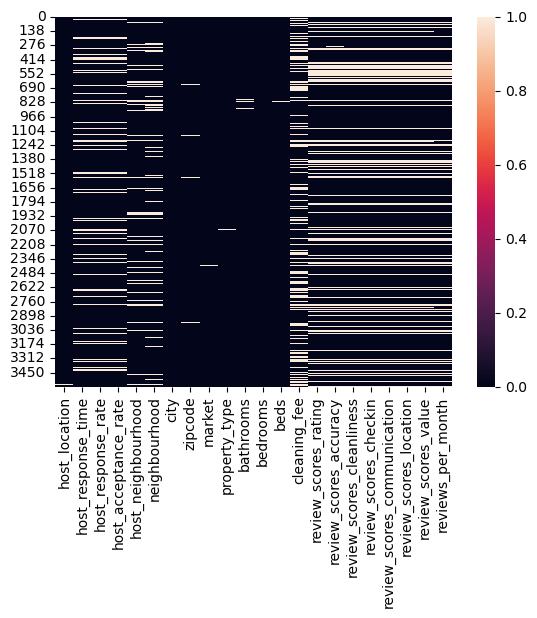

In [68]:
sns.heatmap(df_boston_nulls.isnull())

<Axes: >

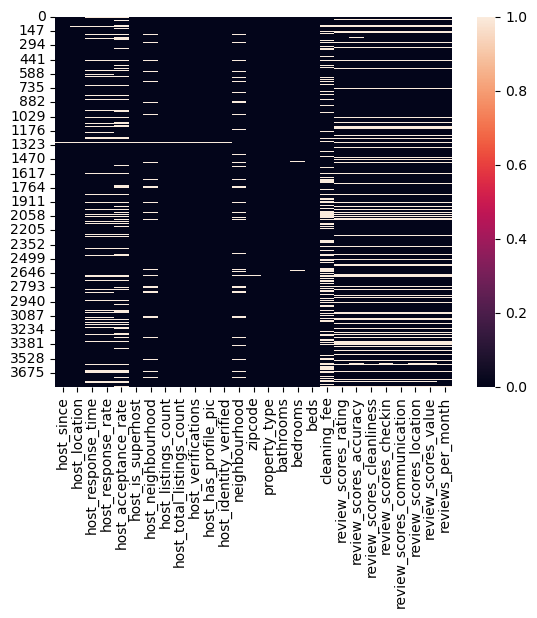

In [74]:
df_seattle_nulls = df_seattle.loc[:,df_seattle.isnull().any()]
sns.heatmap(df_seattle_nulls.isnull())

### We may want to be careful including variables that still contain many missing values. It does appear that the variables that contain null values are relatively consistent across both data sets.

## Change data types to numeric values for percent and price

In [44]:
cols = ['host_response_rate', 'host_acceptance_rate', 'price',
        'cleaning_fee', 'extra_people']
for col in cols:
    df_boston[col] = df_boston[col].str.extract('(\d+)')
    df_boston[col] = pd.to_numeric(df_boston[col])
    df_seattle[col] = df_seattle[col].str.extract('(\d+)')
    df_seattle[col] = pd.to_numeric(df_seattle[col])
df_boston[cols].head()

host_response_rate  host_acceptance_rate  price  cleaning_fee  extra_people
0                 NaN                   NaN    250          35.0             0
1               100.0                 100.0     65          10.0             0
2               100.0                  88.0     65           NaN            20
3               100.0                  50.0     75          50.0            25
4               100.0                 100.0     79          15.0             0

## Updated record of wrangled data

In [49]:
with pd.option_context('display.max_rows',None,'display.max_columns',None): 
    display(df_boston.loc[1,:])

id                                                                            3075044
host_id                                                                       2572247
host_since                                                                 2012-06-07
host_location                                    Boston, Massachusetts, United States
host_response_time                                                     within an hour
host_response_rate                                                              100.0
host_acceptance_rate                                                            100.0
host_is_superhost                                                                   f
host_neighbourhood                                                         Roslindale
host_listings_count                                                                 1
host_total_listings_count                                                           1
host_verifications                  ['email', 'phone',

# Pricing Analysis
### I want to examine pricing across these two markets over many variables. First, we'll take a look at how pricing changes based on the type of rental.
## Distribution of room types of Airbnb rentals in both markets

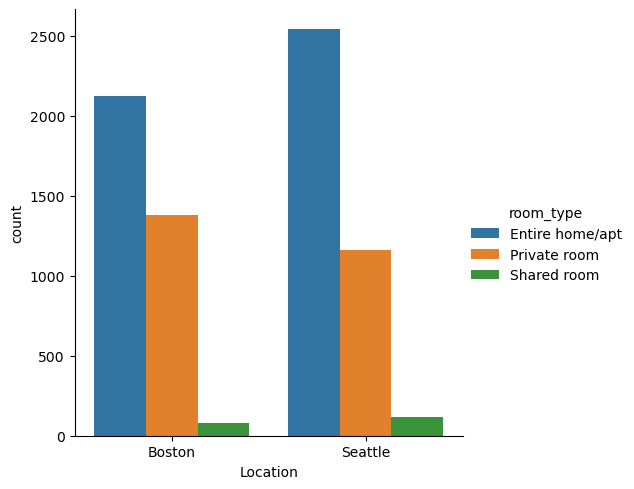

In [231]:
room_types_boston = pd.DataFrame(df_boston['room_type'])
room_types_boston['Location'] = 'Boston'
room_types_seattle = pd.DataFrame(df_seattle['room_type'])
room_types_seattle['Location'] = 'Seattle'
room_types_joined = pd.concat([room_types_boston,room_types_seattle], axis=0)

sns.catplot(kind='count',
            data = room_types_joined,
            x='Location',
            hue = 'room_type')

### It would appear the the distribution of room types is similar across both markets.
## Distribution of property types across Airbnb rentals

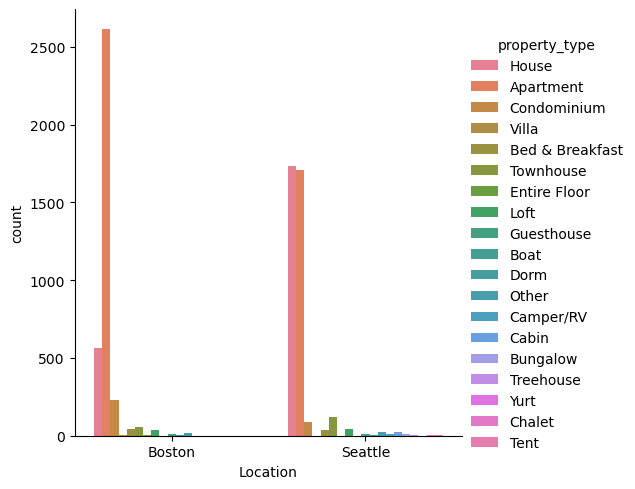

In [134]:
prop_types_boston = pd.DataFrame(df_boston['property_type'])
prop_types_boston['Location'] = 'Boston'
prop_types_seattle = pd.DataFrame(df_seattle['property_type'])
prop_types_seattle['Location'] = 'Seattle'
prop_types_joined = pd.concat([prop_types_boston,prop_types_seattle], axis=0)

sns.catplot(kind='count',
            data = prop_types_joined,
            x='Location',
            hue = 'property_type')

### Houses, apartments, and condominiums make up the majority of property types, with Boston having majority apartments and Seattle having similar apartment and house rentals. Note that Seattle has more townhouse rentals than condominiums. Let's take a deeper look at the top four property types in both markets.

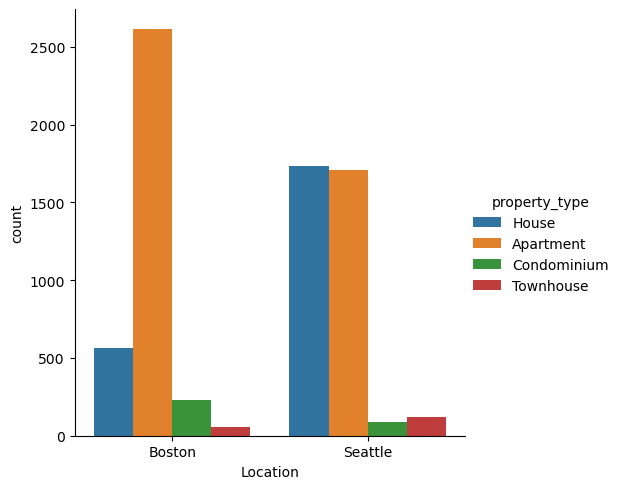

In [138]:
type_filter = ['House','Apartment','Condominium','Townhouse']
prop_types_joined_trunc = prop_types_joined.loc[prop_types_joined['property_type'].isin(type_filter)]


sns.catplot(kind='count',
            data = prop_types_joined_trunc,
            x='Location',
            hue = 'property_type')

### This is much more readable. For comparative purposes, let's recast this data as proportion of total listings.

In [254]:
a = df_boston['property_type'].value_counts()
sum(a)

3582

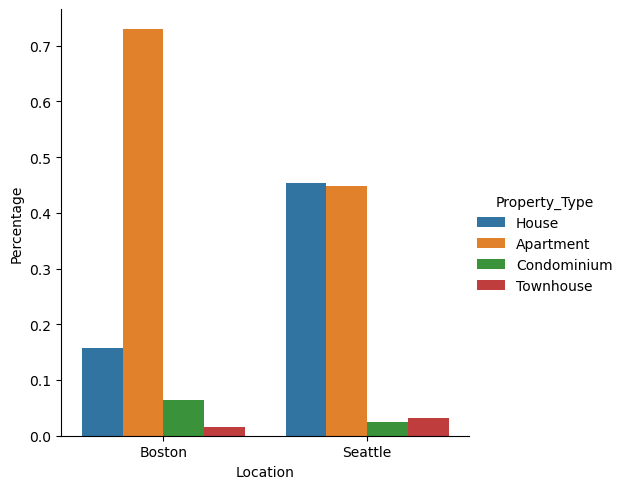

In [276]:
boston_prop_counts = df_boston['property_type'].value_counts()
boston_prop_types = boston_prop_counts/sum(boston_prop_counts)
seattle_prop_counts = df_seattle['property_type'].value_counts()
seattle_prop_types = seattle_prop_counts/sum(seattle_prop_counts)

df_prop_pricing = pd.DataFrame(data={'Location':['Boston','Seattle'],
                                     'House':[boston_prop_types['House'],seattle_prop_types['House']],
                                     'Apartment':[boston_prop_types['Apartment'],seattle_prop_types['Apartment']],
                                     'Condominium':[boston_prop_types['Condominium'],seattle_prop_types['Condominium']],
                                     'Townhouse':[boston_prop_types['Townhouse'],seattle_prop_types['Townhouse']]})

df_prop_pricing_melt = pd.melt(df_prop_pricing, id_vars='Location')
df_prop_pricing_melt = df_prop_pricing_melt.rename(columns={'variable':'Property_Type',
                                                             'value':'Percentage'})
                                                            
sns.catplot(data = df_prop_pricing_melt,
            x = 'Location',
            y = 'Percentage',
            hue = 'Property_Type',
            kind = 'bar')

### Note that these values are normalized to each market; for instance, over 70% of rentals *in Boston* are apartments.

## Pricing trends over property and room types

<Axes: xlabel='property_type', ylabel='price'>

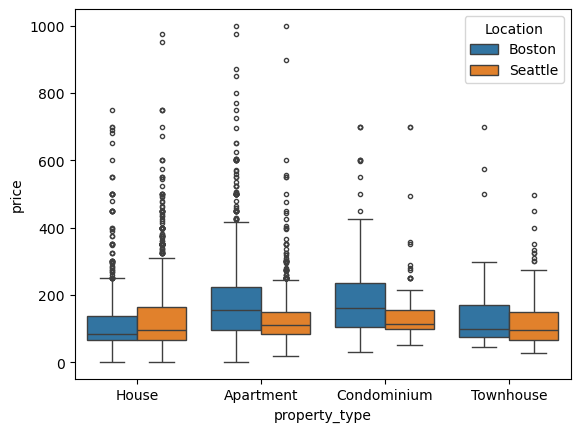

In [160]:
price_df_boston = pd.DataFrame(df_boston[['price','room_type','property_type']])
price_df_boston['Location'] = 'Boston'
price_df_seattle = pd.DataFrame(df_seattle[['price','room_type','property_type']])
price_df_seattle['Location'] = 'Seattle'
price_df_joined = pd.concat([price_df_boston,price_df_seattle], axis=0)

price_df_joined_trunc = price_df_joined.loc[price_df_joined['property_type'].isin(type_filter)]

sns.boxplot(data = price_df_joined_trunc,
            x = 'property_type',
            y = 'price',
            hue = 'Location',
            fliersize=3)

### Pricing appears to be slightly higher, overall, in Boston. Houses in Seattle tend to run a bit more expensive than those in Boston, although there are many more houses in Seattle than in Boston. I do find it interesting that houses are the least expensive option in Boston.

<Axes: xlabel='room_type', ylabel='price'>

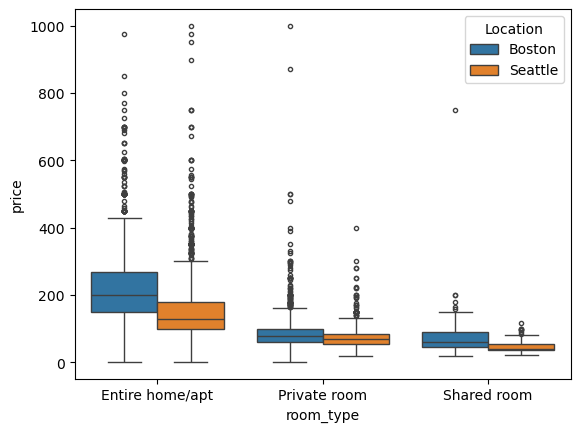

In [162]:
sns.boxplot(data = price_df_joined_trunc,
            x = 'room_type',
            y = 'price',
            hue = 'Location',
            fliersize=3)

### When braking prices down by room type, we can see that Boston is the more expensive market across all room types. In reference to the previous chart, I would imagine that houses are less expensive in the Boston market due to geographical features. Perhaps looking at location would lend some more insight into both the unexpected pricing and the imbalance of houses to apartments in Boston.

Text(0.5, 1.0, 'Boston')

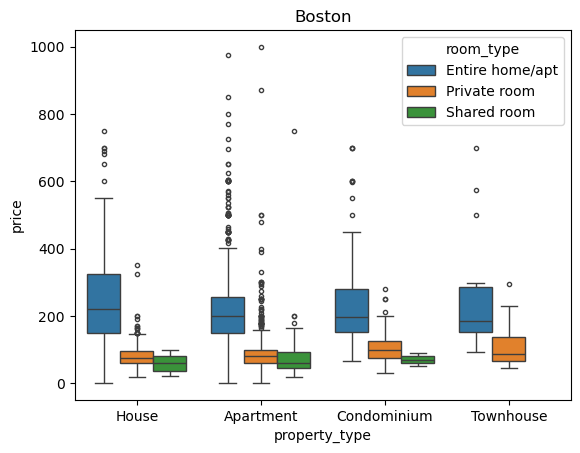

In [286]:
sns.boxplot(data = price_df_joined_trunc.loc[price_df_joined_trunc['Location']=='Boston'],
            x = 'property_type',
            y = 'price',
            hue = 'room_type',
            fliersize=3)
plt.title('Boston')

Text(0.5, 1.0, 'Seattle')

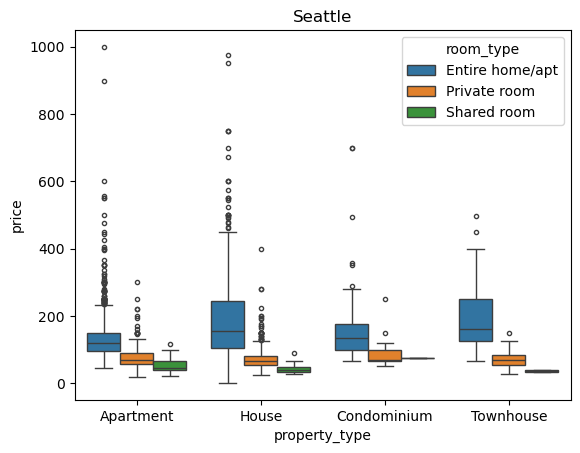

In [288]:
sns.boxplot(data = price_df_joined_trunc.loc[price_df_joined_trunc['Location']=='Seattle'],
            x = 'property_type',
            y = 'price',
            hue = 'room_type',
            fliersize=3)
plt.title('Seattle')

### Comparing these two charts does show that, overall, the Boston market is more expensive across all metrics. It would appear that the addition of private and shared rooms to the house pricing distribution has significantly decreased the median price for a house rental in the Boston market as seen in the comparitive property type pricing chart above.

## Geographic Pricing Trends

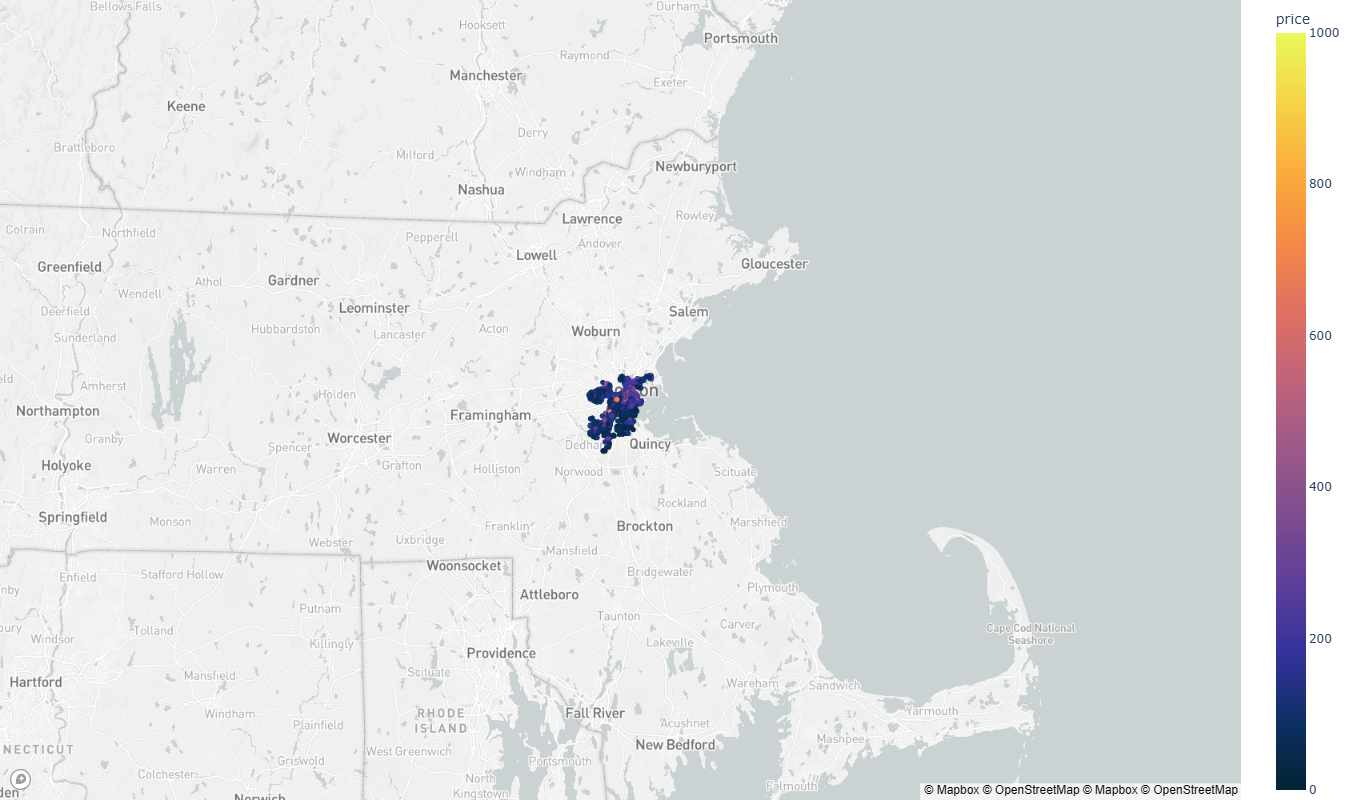

In [219]:
px.set_mapbox_access_token("pk.eyJ1Ijoia2thcmJhY2giLCJhIjoiY2x6cmcwODA2MDZpZTJyb25xaXZpanhydyJ9.M_NINK4dMqEUUdfe1Kdmqw")
fig = px.scatter_mapbox(df_boston,
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'price',
                        color_continuous_scale=px.colors.sequential.thermal,
                        range_color=(0,1000),
                        width = 800,
                        height = 800)
# fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

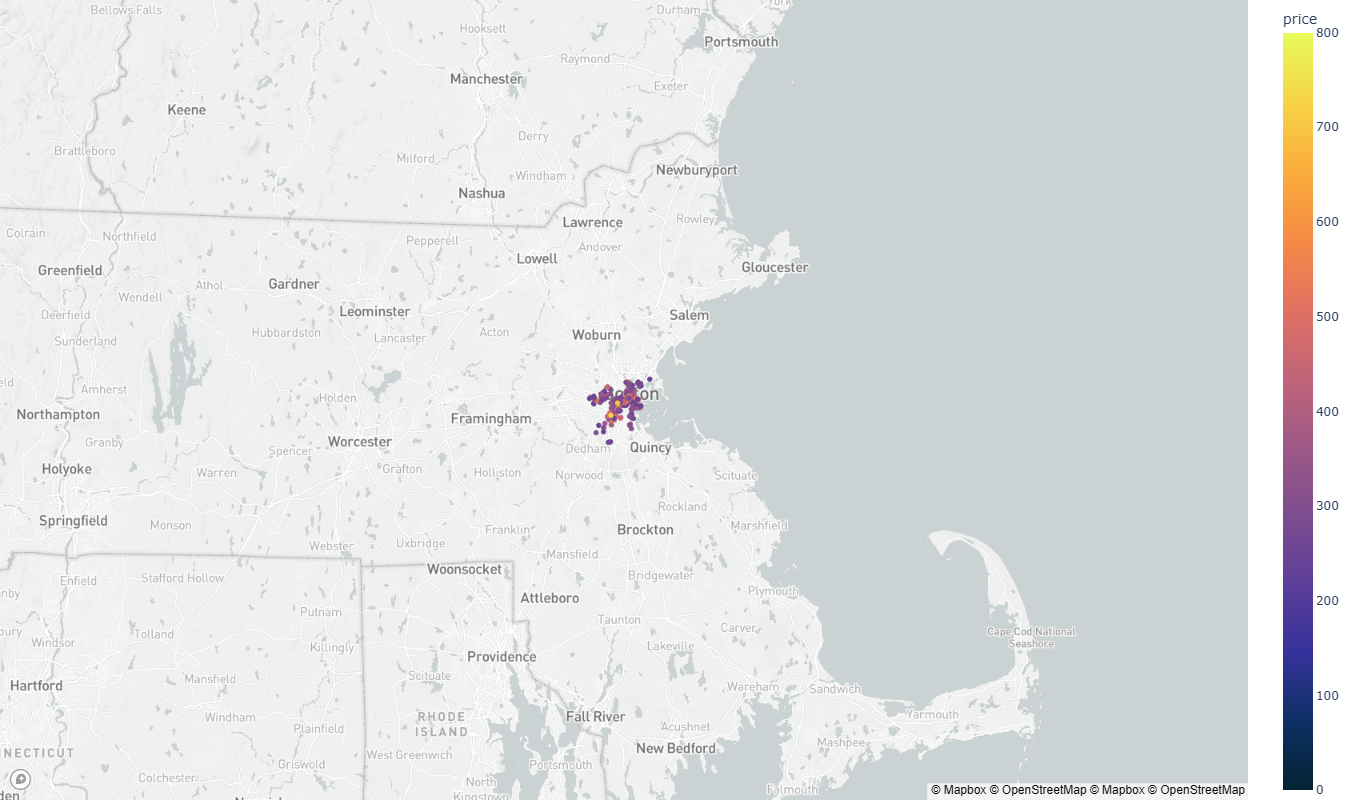

In [221]:
boston_price_filter = df_boston['price'].quantile(.8)

fig = px.scatter_mapbox(df_boston[df_boston['price']>boston_price_filter],
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'price',
                        color_continuous_scale=px.colors.sequential.thermal,
                        range_color=(0,800),
                        width = 800,
                        height = 800)
# fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

### The first chart shows all the properties in the Boston market colored by price. The second shows the 20% most expensive properties. This more clearly shows the density of properties in the high-priced areas of town.

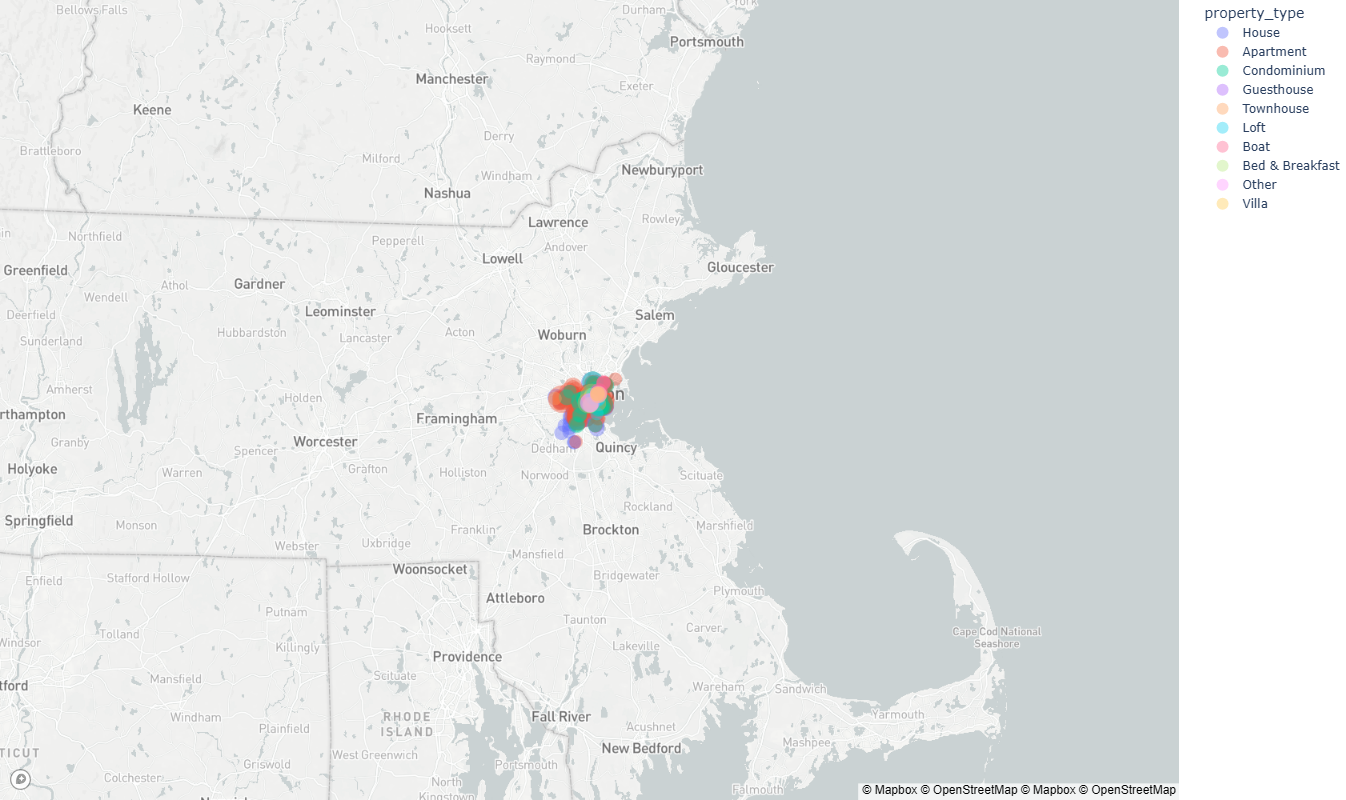

In [316]:
fig = px.scatter_mapbox(df_boston[df_boston['price']>boston_price_filter],
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'property_type',
                        color_discrete_sequence = px.colors.qualitative.Plotly,
                        size = 'price',
                        opacity=.4,
                        width = 800,
                        height = 800)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

### We can see that apartments and condos dominate the market towards downtown, with houses further out. Scaling the point size by price and setting transparancy allows us to have some visual intuition about which areas are dominated by the most expensive rentals.

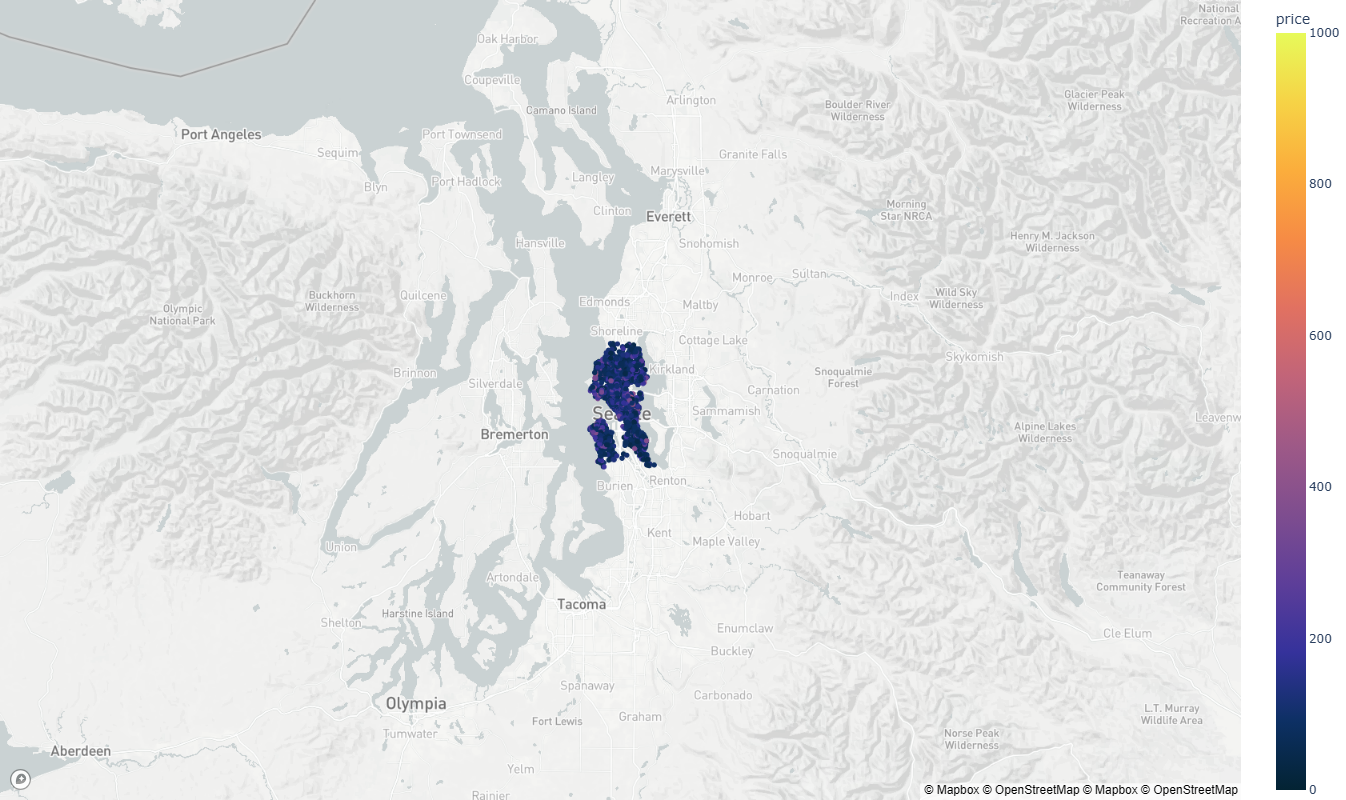

In [322]:
fig = px.scatter_mapbox(df_seattle,
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'price',
                        color_continuous_scale=px.colors.sequential.thermal,
                        range_color=(0,1000),
                        width = 800,
                        height = 800)
# fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

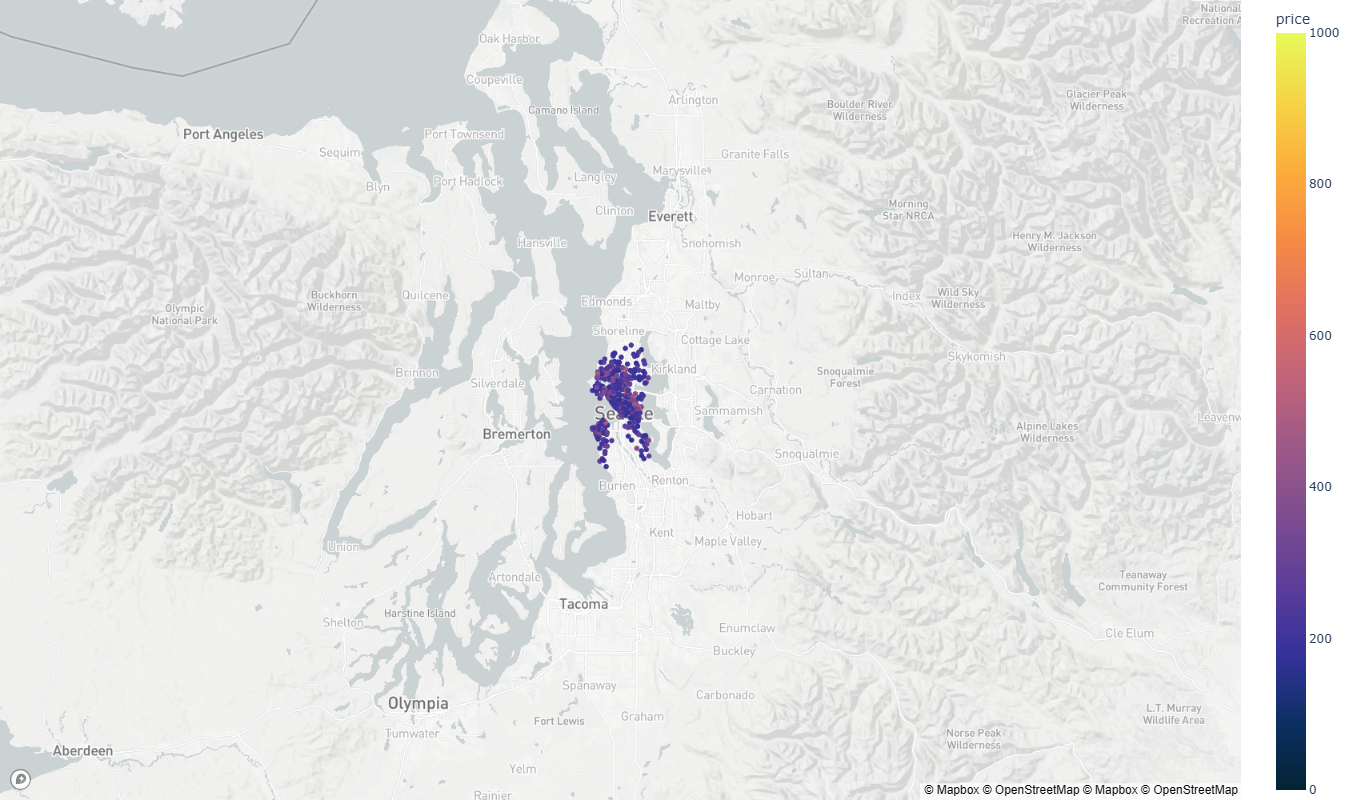

In [229]:
seattle_price_filter = df_seattle['price'].quantile(.8)

fig = px.scatter_mapbox(df_seattle[df_seattle['price']>seattle_price_filter],
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'price',
                        color_continuous_scale=px.colors.sequential.thermal,
                        range_color=(0,1000),
                        width = 800,
                        height = 800)
# fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

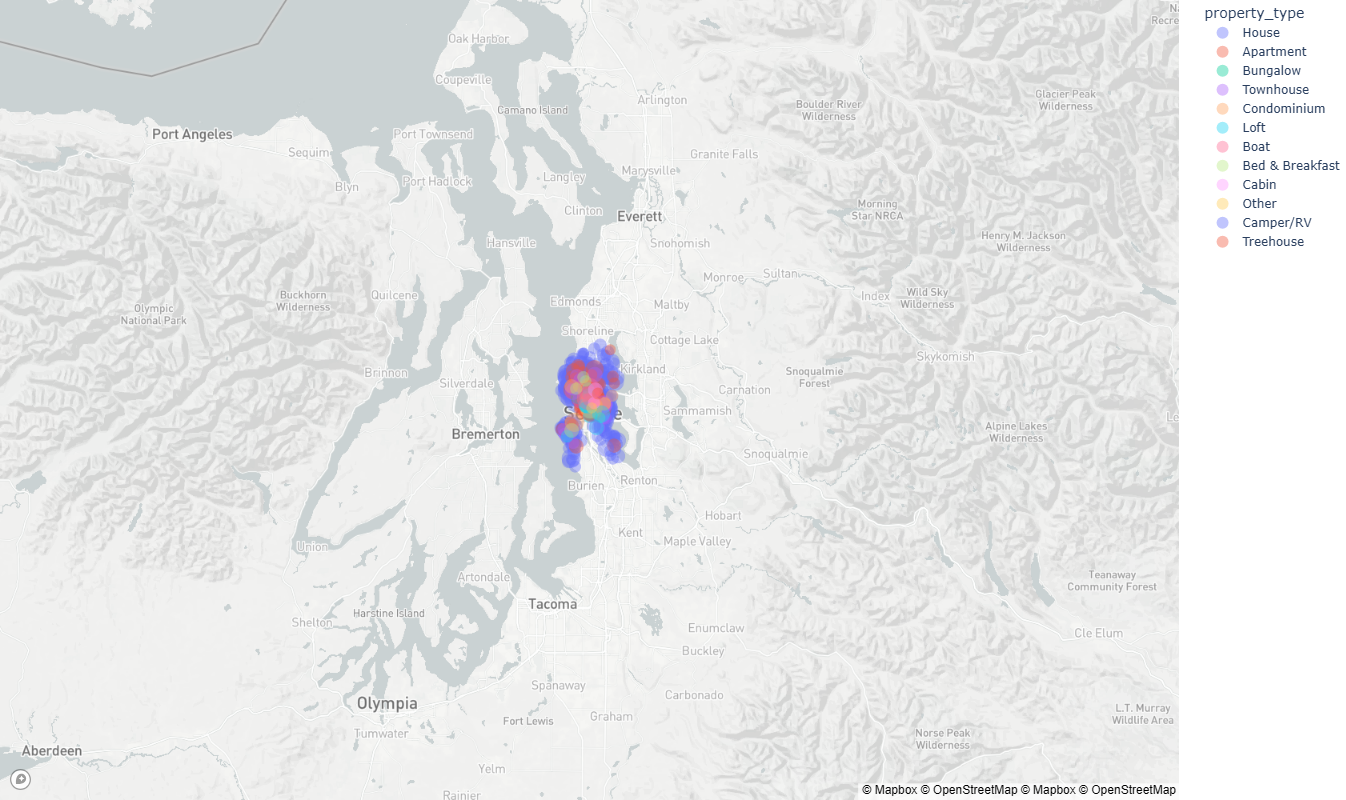

In [319]:
fig = px.scatter_mapbox(df_seattle[df_seattle['price']>seattle_price_filter],
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'property_type',
                        size = 'price',
                        opacity = .4,
                        width = 800,
                        height = 800)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

### We see very similar geographic information in the Seattle market -- downtown is dominated by apartments, lofts, and condos, while houses are further from the city center. The main difference that is visible are the far greater number of houses in the Seattle market, especially in the suburbs north of the channel.

# Examine numeric variables that affect the price of a rental using multiple linear regression

### First, we will recast our data into a dataframe that only contains numeric data and begin to work with records with empty data.

<Axes: >

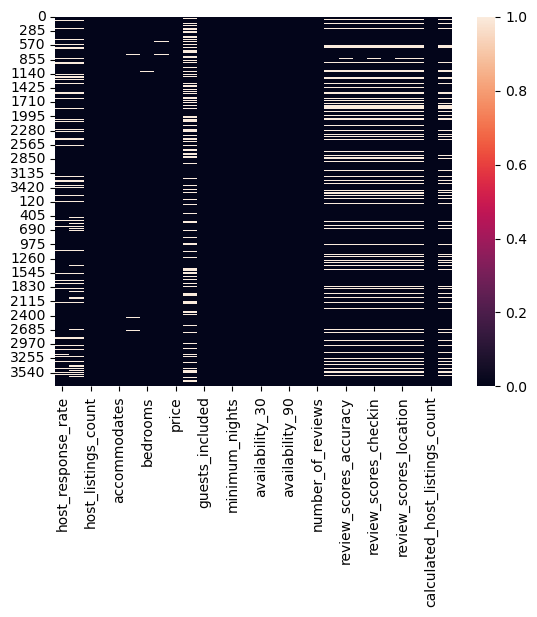

In [366]:
df_boston_numeric = df_boston.select_dtypes(include='number')
df_seattle_numeric = df_seattle.select_dtypes(include='number')
droplist = ['id', 'host_id', 'latitude', 'longitude']
df_boston_numeric = df_boston_numeric.drop(droplist,axis=1)
df_seattle_numeric = df_seattle_numeric.drop(droplist,axis=1)
df_numeric_combined = pd.concat([df_boston_numeric,df_seattle_numeric],axis=0)
sns.heatmap(df_numeric_combined.isnull())

In [374]:
total = df_numeric_combined.isnull().sum().sort_values(ascending=False)
percent = (df_numeric_combined.isnull().sum()/df_numeric_combined.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_filtered = missing_data[missing_data['Percent']>0]
missing_data_filtered.head(15)

Total   Percent
cleaning_fee                  2137  0.288667
review_scores_accuracy        1481  0.200054
review_scores_checkin         1478  0.199649
review_scores_value           1477  0.199514
review_scores_location        1477  0.199514
review_scores_cleanliness     1471  0.198703
review_scores_communication   1469  0.198433
review_scores_rating          1460  0.197217
reviews_per_month             1383  0.186816
host_acceptance_rate          1244  0.168040
host_response_rate             994  0.134270
bathrooms                       30  0.004052
bedrooms                        16  0.002161
beds                            10  0.001351
host_listings_count              2  0.000270

### Empty values will be filled with the median of the feature. This was the chosen method to attempt to maintain the linear relationship of data that fall further from the median values.

<Axes: >

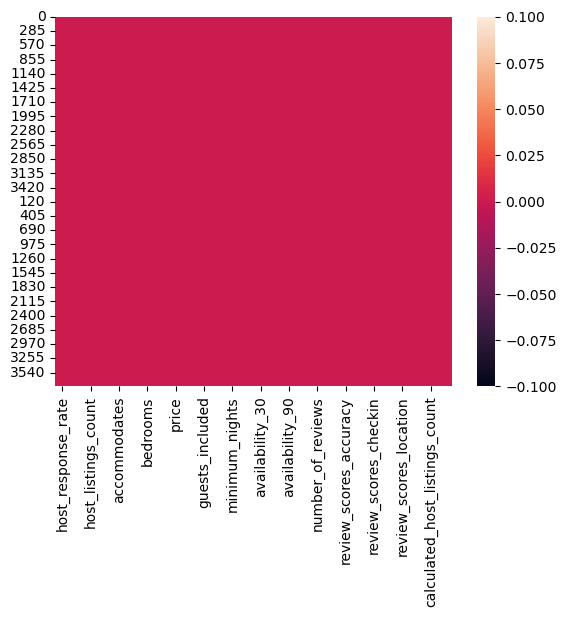

In [396]:
colnames = list(missing_data_filtered.index)
df_numeric_filled = df_numeric_combined
for i in colnames:
    df_numeric_filled[i] = df_numeric_filled[i].fillna(df_numeric_filled[i].median())
sns.heatmap(df_numeric_filled.isnull())

### This figure shows the correlations between all the numeric data in the frame. Note the areas of high multicorrelation.

<Axes: >

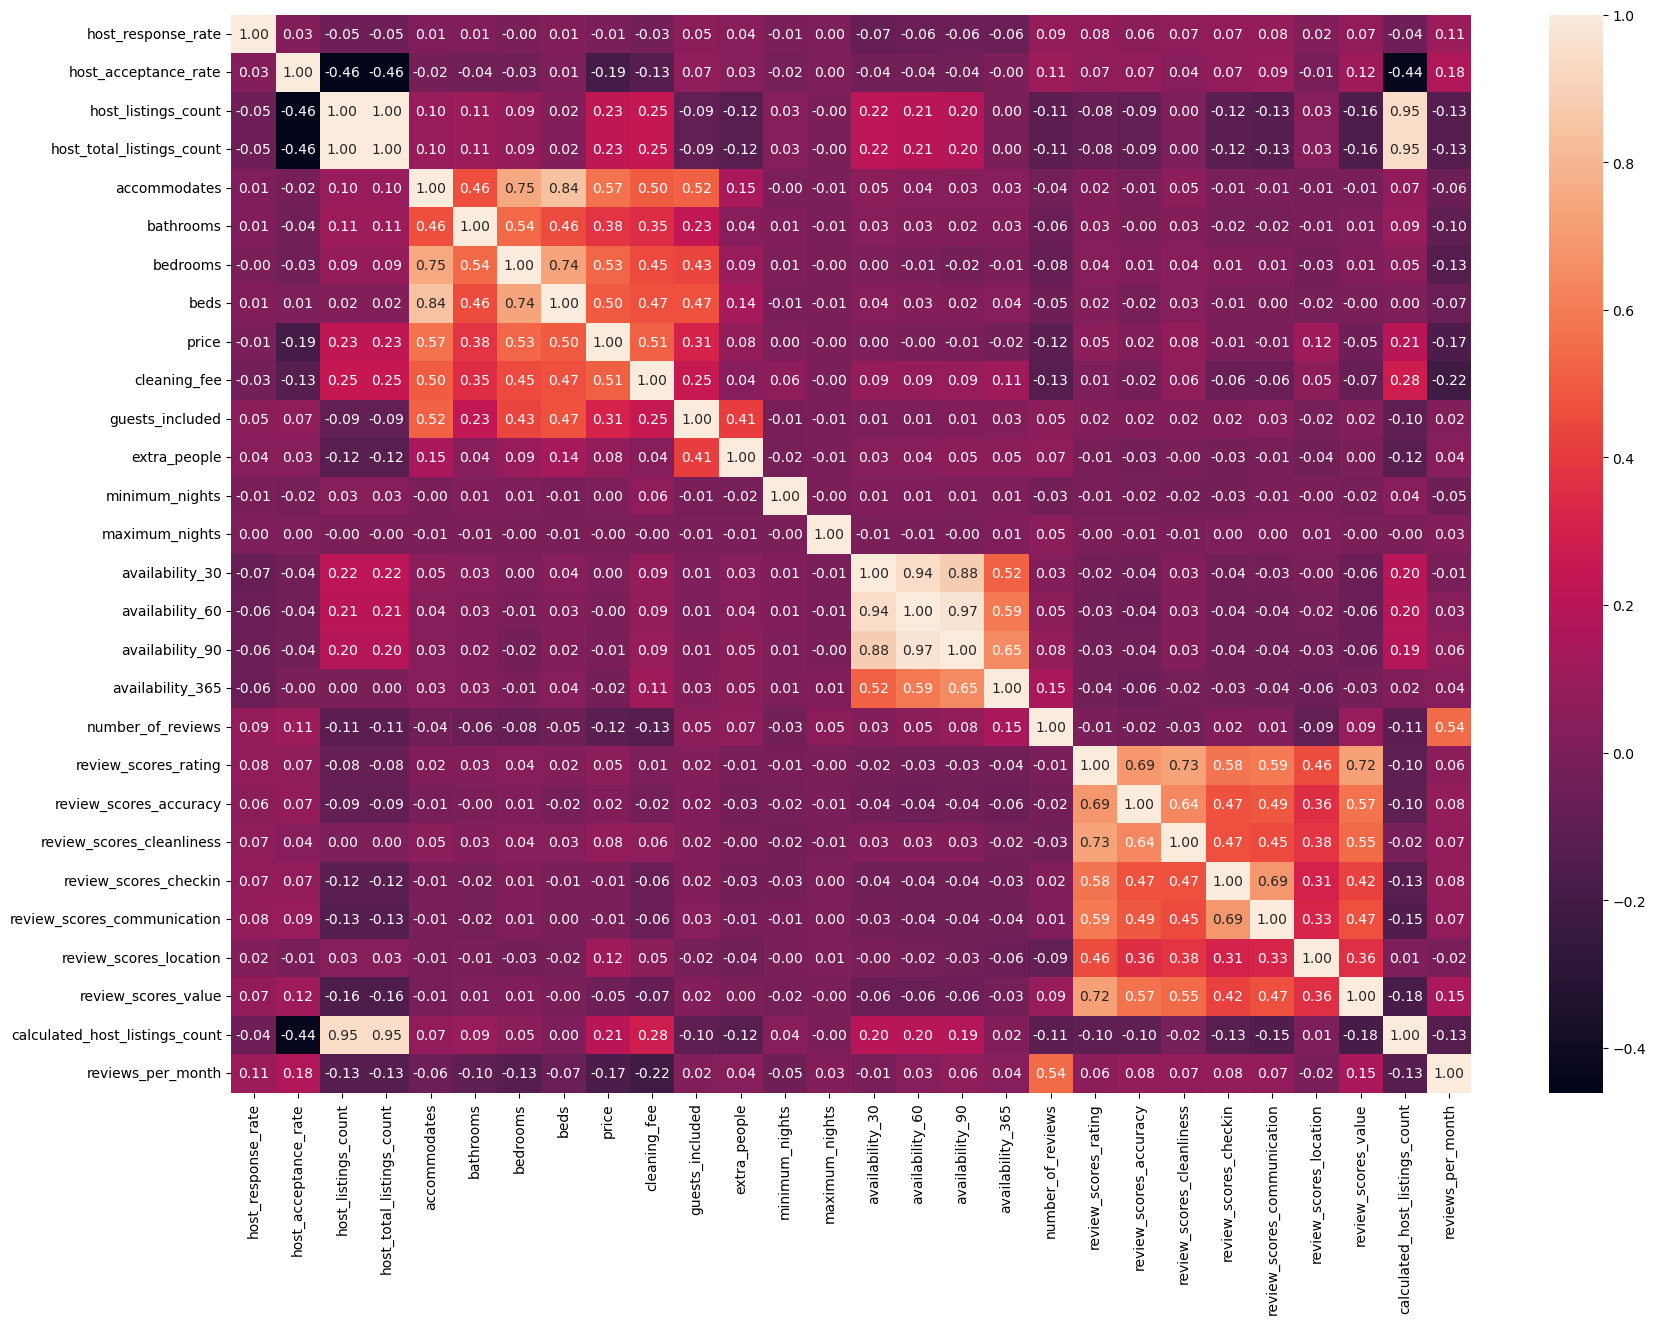

In [ ]:
plt.figure(figsize=(20,14))
sns.heatmap(df_numeric_filled.corr(),
            annot=True,
            fmt='.2f')

# Regression modeling

### Now we will begin modeling the data, first using all the features as predictor variables

In [507]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [516]:
y = df_numeric_filled['price']
X = df_numeric_filled.drop('price',axis=1)
X = sm.add_constant(X)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
model = sm.OLS(y_train, X_train).fit() 
y_pred = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 20 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:18:59   Log-Likelihood:                -29722.
No. Observations:                5182   AIC:                         5.950e+04
Df Residuals:                    5155   BIC:                         5.967e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -13.6617     22.879     -0.597      0.550     -58.514      31.191
host_response_rate                 0.0800      0.092      0.865      0.387      -0.101       0.261
host_acceptance_rate              -0.7628      0.075    -10.197      0.000      -0.909      -0.616
host_listings_count                0.0538      0.014      3.921      0.000       0.027       0.081
host_total_listings_count          0.0538      0.014      3.921      0.000       0.027       0.081
accommodates                      15.6621      1.157     13.537      0.000      13.394      17.930
bathrooms                         13.7492      2.349      5.853      0.000       9.144      18.354
bedrooms                          19.2654      2.177      8.849      0.000      14.997      23.533
beds                              -1.7714      1.915     -0.925      0.355      -5.526       1.984
cleaning_fee                       0.5356      0.032     16.874      0.000       0.473       0.598
guests_included                    3.4917      1.151      3.035      0.002       1.236       5.747
extra_people                       0.1461      0.066      2.212      0.027       0.017       0.276
minimum_nights                    -0.3668      0.205     -1.788      0.074      -0.769       0.035
maximum_nights                    -0.0001      0.001     -0.158      0.874      -0.002       0.001
availability_30                   -0.7003      0.299     -2.345      0.019      -1.286      -0.115
availability_60                    0.0049      0.302      0.016      0.987      -0.588       0.598
availability_90                    0.1375      0.152      0.905      0.366      -0.160       0.435
availability_365                  -0.0252      0.010     -2.420      0.016      -0.046      -0.005
number_of_reviews                  0.0290      0.035      0.838      0.402      -0.039       0.097
review_scores_rating               0.8314      0.286      2.909      0.004       0.271       1.392
review_scores_accuracy            -0.2123      1.975     -0.107      0.914      -4.084       3.659
review_scores_cleanliness          1.7383      1.754      0.991      0.322      -1.701       5.177
review_scores_checkin             -3.6971      2.463     -1.501      0.133      -8.525       1.131
review_scores_communication        0.1727      2.585      0.067      0.947      -4.894       5.240
review_scores_location            16.7062      1.667     10.023      0.000      13.438      19.974
review_scores_value              -11.8681      1.936     -6.129      0.000     -15.664      -8.072
calculated_host_listings_count    -0.3313      0.156     -2.131      0.033      -0.636      -0.026
reviews_per_month                 -2.9708      0.703     -4.225      0.000      -4.349      -1.592
==============

In [518]:
print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  64627.501636654524
mean_absolute_error :  56.138072313028296


### Note that we have a low adjusted R-sqared value and a warning that multicollinearity may be present. There are features that need to be dropped from the model.


## Feature selection using VIF
### Variable inflation factor (VIF) is used to evaluate the existence and degree of multicollinearity. Here we will drop all variables with a VIF greater than 10.

In [520]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.values.shape[1])]
vif["features"] = X_train.columns
print(vif.round(1))

    VIF Factor                        features
0        480.5                           const
1          1.0              host_response_rate
2          1.3            host_acceptance_rate
3          inf             host_listings_count
4          inf       host_total_listings_count
5          4.4                    accommodates
6          1.5                       bathrooms
7          2.9                        bedrooms
8          3.9                            beds
9          1.6                    cleaning_fee
10         1.7                 guests_included
11         1.3                    extra_people
12         1.0                  minimum_nights
13         1.0                  maximum_nights
14        11.9                 availability_30
15        47.8                 availability_60
16        26.1                 availability_90
17         1.9                availability_365
18         1.5               number_of_reviews
19         4.2            review_scores_rating
20         2.

C:\Users\keega\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



In [609]:
droplist = ['const','host_listings_count','host_total_listings_count','availability_30','availability_60','availability_90','calculated_host_listings_count']
X_vif = X.drop(droplist,axis=1)
X_train,X_test, y_train, y_test = train_test_split(X_vif, y, test_size = 0.3, random_state = 100)
model_vif = sm.OLS(y_train, X_train).fit()
y_pred = model_vif.predict(X_test)
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                              1142.
Date:                Tue, 20 Aug 2024   Prob (F-statistic):                        0.00
Time:                        14:26:53   Log-Likelihood:                         -29743.
No. Observations:                5182   AIC:                                  5.953e+04
Df Residuals:                    5161   BIC:                                  5.966e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_response_rate              0.1048      0.087      1.200      0.230      -0.066       0.276
host_acceptance_rate           -0.9234      0.066    -13.962      0.000      -1.053      -0.794
accommodates                   16.1903      1.153     14.037      0.000      13.929      18.451
bathrooms                      13.9487      2.349      5.938      0.000       9.344      18.554
bedrooms                       20.0613      2.167      9.257      0.000      15.813      24.310
beds                           -2.9602      1.908     -1.551      0.121      -6.701       0.781
cleaning_fee                    0.5529      0.031     17.946      0.000       0.493       0.613
guests_included                 3.1054      1.149      2.704      0.007       0.854       5.357
extra_people                    0.1130      0.066      1.717      0.086      -0.016       0.242
minimum_nights                 -0.3514      0.205     -1.713      0.087      -0.754       0.051
maximum_nights                 -0.0002      0.001     -0.222      0.825      -0.002       0.001
availability_365               -0.0348      0.008     -4.494      0.000      -0.050      -0.020
number_of_reviews               0.0305      0.035      0.879      0.379      -0.038       0.099
review_scores_rating            0.8659      0.285      3.035      0.002       0.306       1.425
review_scores_accuracy         -0.2739      1.961     -0.140      0.889      -4.119       3.571
review_scores_cleanliness       1.9407      1.748      1.110      0.267      -1.485       5.367
review_scores_checkin          -3.6446      2.407     -1.514      0.130      -8.364       1.075
review_scores_communication    -0.4095      2.520     -0.163      0.871      -5.349       4.530
review_scores_location         17.1702      1.563     10.985      0.000      14.106      20.235
review_scores_value           -12.4629      1.924     -6.478      0.000     -16.235      -8.691
reviews_per_month              -2.7842      0.698     -3.987      0.000      -4.153      -1.415
==============================================================================
Omnibus:                     2635.853   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33521.264
Skew:                           2.125   Prob(JB):                         0.00
Kurtosis:                      14.712   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The con

In [611]:
print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  120932.07740692158
mean_absolute_error :  58.92736455497901


### Our adjusted R squared value has gone up significantly, but the mean errors have also gone up and we still have multicollinearity. Now we will examine another method of feature selection.

## Recursive Feature Elimination with Cross Validation using SciKit Learn
### This implementation from scikit learn will automatically choose the optimal number of features for our regression analysis. From the documentation:

#### "The number of features selected is tuned automatically by fitting an RFE selector on the different cross-validation splits (provided by the cv parameter). The performance of the RFE selector are evaluated using scorer for different number of selected features and aggregated together. Finally, the scores are averaged across folds and the number of features selected is set to the number of features that maximize the cross-validation score."


In [594]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

rfe = RFECV(estimator=DecisionTreeRegressor(),
           scoring='neg_mean_squared_error',
           min_features_to_select=5,
            cv=10,
           n_jobs=-1)
rfe.fit(X,y)
print(rfe.get_feature_names_out())

['host_acceptance_rate' 'host_total_listings_count' 'accommodates'
 'bathrooms' 'bedrooms' 'cleaning_fee' 'extra_people' 'minimum_nights'
 'availability_90' 'availability_365' 'number_of_reviews'
 'reviews_per_month']


In [596]:
X_rfe = df_numeric_filled.loc[:,rfe.support_]
X_train,X_test, y_train, y_test = train_test_split(X_rfe, y, test_size = 0.3, random_state = 100)
model_rfe = sm.OLS(y_train, X_train).fit()
y_pred = model_rfe.predict(X_test)
model_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              1850.
Date:                Tue, 20 Aug 2024   Prob (F-statistic):                        0.00
Time:                        14:10:29   Log-Likelihood:                         -29909.
No. Observations:                5182   AIC:                                  5.984e+04
Df Residuals:                    5170   BIC:                                  5.992e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
host_listings_count     0.1006      0.010     10.532      0.000       0.082       0.119
accommodates           16.8316      1.159     14.521      0.000      14.559      19.104
bathrooms              24.2420      2.135     11.354      0.000      20.056      28.428
bedrooms               19.8991      2.221      8.958      0.000      15.544      24.254
beds                   -2.2782      1.980     -1.150      0.250      -6.160       1.604
cleaning_fee            0.6147      0.032     19.389      0.000       0.553       0.677
extra_people            0.3130      0.062      5.033      0.000       0.191       0.435
minimum_nights         -0.1431      0.209     -0.684      0.494      -0.553       0.267
availability_90        -0.0397      0.042     -0.951      0.342      -0.121       0.042
availability_365       -0.0025      0.010     -0.239      0.811      -0.023       0.018
number_of_reviews      -0.0308      0.035     -0.870      0.384      -0.100       0.039
reviews_per_month      -1.0507      0.666     -1.578      0.115      -2.356       0.254
==============================================================================
Omnibus:                     2408.806   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26605.862
Skew:                           1.935   Prob(JB):                         0.00
Kurtosis:                      13.404   Cond. No.                         642.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [598]:
print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  6342.254714222524
mean_absolute_error :  52.25063435239394


### Here we can see that we have reduced the mean absolute error over our first pass at multiple regression. This is just a hint at how much analysis can be done using regression methods and implementations in scikit learn. Deeper analysis is beyond the scope of this project.